# Análise geral do dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bank_train.csv")
df_clean = df.copy()

Verificando quantos dados vazios (NaN) temos de cada tipo


In [3]:
df.isna().sum()

id               0
age           1199
job           1349
marital         97
education        0
location     21502
default          0
balance       1792
housing          0
loan             0
contact        734
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome         0
y                0
dtype: int64

In [4]:
df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no


In [5]:
df.describe().round(2)


,id,age,balance,day,duration,campaign,pdays,previous
count,40000.00,38801.00,38208.00,40000.00,40000.00,38603.00,40000.00,39703.00
mean,19999.50,40.96,1364.65,15.82,380.42,2.75,40.36,0.58
std,11547.15,11.03,3059.02,8.33,3044.41,3.04,100.29,2.34
min,0.00,8.00,-8019.00,1.00,-20.00,1.00,-1.00,0.00
25%,9999.75,33.00,73.00,8.00,102.00,1.00,-1.00,0.00
50%,19999.50,39.00,450.50,16.00,180.00,2.00,-1.00,0.00
75%,29999.25,48.00,1423.00,21.00,320.00,3.00,-1.00,0.00
max,39999.00,150.00,102127.00,31.00,75000.00,58.00,871.00,275.00


In [6]:
df.describe(include=['object'])

,job,marital,education,location,default,housing,loan,contact,month,poutcome,y
count,38651,39903,40000,18498,40000,40000,40000,39266,40000,40000,40000
unique,13,3,4,6,2,2,4,3,12,4,2
top,blue-collar,married,secondary,Lisboa,no,yes,no,cellular,may,unknown,no
freq,8313,24009,20563,9261,39268,22213,23551,25447,12200,32662,35322


Analisando quais os diferentes valores que cada string assume, nelas a gente observa que algumas string tem seus valores como YES ou NO e podemos substitui-las por 1 e 0

In [7]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()

for col in categoricas:
  print(col)
  print(df[col].unique(), "\n")

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] 

marital
['single' 'married' 'divorced' nan] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

location
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] 

default
['no' 'yes'] 

housing
['no' 'yes'] 

loan
['no' 'n' 'y' 'yes'] 

contact
['cellular' 'unknown' nan 'telephone'] 

month
['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] 

poutcome
['unknown' 'other' 'failure' 'success'] 

y
['no' 'yes'] 



In [8]:
df_clean = df.copy()

## Mapeamento de dados

In [9]:
#Treino
df_clean['y'] = df_clean['y'].replace({"yes": 1, "no": 0})
df_clean['loan'] = df_clean['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
df_clean['default'] = df_clean['default'].replace({'no': 0, 'yes':1})
df_clean['housing'] = df_clean['housing'].replace({'no': 0, 'yes':1})

C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\1203991595.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['y'] = df_clean['y'].replace({"yes": 1, "no": 0})
C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\1203991595.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['loan'] = df_clean['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\1203991595.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

MAPEAMENTOS UTEIS PARA O MODELO

In [10]:

#MAPEAMENTOS
#Treino
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Aplicar o mapeamento à coluna 'month'
df_clean['month'] = df_clean['month'].map(month_mapping)

education_mapping = {
    'primary': 1, 'secondary': 2, 'tertiary': 3
}

# Aplicar o mapeamento à coluna 'month'
df_clean['education'] = df_clean['education'].map(education_mapping)

marital_mapping = {
    'single': 1, 'married': 2, 'divorced': 3
}

df_clean['marital'] = df_clean['marital'].map(marital_mapping)
#Teste

contact_mapping = {
    'cellular': 1, 'unknown': 0, 'telephone': 2
}

df_clean['contact'] = df_clean['contact'].map(contact_mapping)
#Teste

job_mapping = {
    'management':1, 'blue-collar':2, 'student':3, 'self-employed':4, 'technician':5,
 'administrator':6, 'retired':7, 'housemaid':8, 'services':9, 'unemployed':10,
 'admin.':6, 'unknown':0, 'entrepreneur':11 
}

df_clean['job'] = df_clean['job'].map(job_mapping)





## Limpeza de linhas desconhecidas (unknown)

In [11]:
ocorrencias = df['job'].value_counts().get('unknown', 0)
print(ocorrencias)
# dropar esses 239

239


In [12]:
df_clean = df_clean[df_clean['job'] != 'unknown']
df_clean = df_clean[df_clean['education'] != 'unknown']

df_clean = df_clean.dropna(subset=['marital'])
df_clean = df_clean.dropna(subset=['job'])
df_clean = df_clean.dropna(subset=['contact'])

In [13]:
df_clean.isna().sum()

id               0
age           1134
job              0
marital          0
education     1561
location     20338
default          0
balance       1697
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign      1322
pdays            0
previous       281
poutcome         0
y                0
dtype: int64

## Limpeza de colunas com muitos NaN

In [14]:
df_clean = df_clean.drop(columns=['location'])
# Mais que 21K de NaN


In [15]:
df_clean = df_clean.drop(columns=['poutcome'])

#32000 unknown

In [16]:
df_clean = df_clean.drop(columns=['id'])

#dropar pq n tem significado


In [17]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.0,1.0,1.0,3.0,0,4522.0,0,0,1.0,28,8,55,1.0,-1,0.0,0
1,42.0,2.0,2.0,1.0,1,398.0,1,0,0.0,16,5,251,4.0,-1,0.0,0
2,26.0,3.0,1.0,2.0,0,706.0,0,0,0.0,8,10,118,1.0,105,2.0,0
3,54.0,1.0,2.0,3.0,0,0.0,0,1,1.0,19,11,307,3.0,-1,0.0,0
4,43.0,4.0,2.0,2.0,0,918.0,1,0,0.0,6,5,193,1.0,-1,0.0,0


## Remoção de outliers

In [39]:
#Retirando outliers
df_clean= df_clean[(df_clean['balance'] < 15000) & (df_clean['balance'] > -5000) ]
df_clean = df_clean[(df_clean['age'] <= 80) & (df_clean['age'] > 18)]
df_clean = df_clean[(df_clean['previous'] <= 30) ]

### Gráficos de barras

Idade

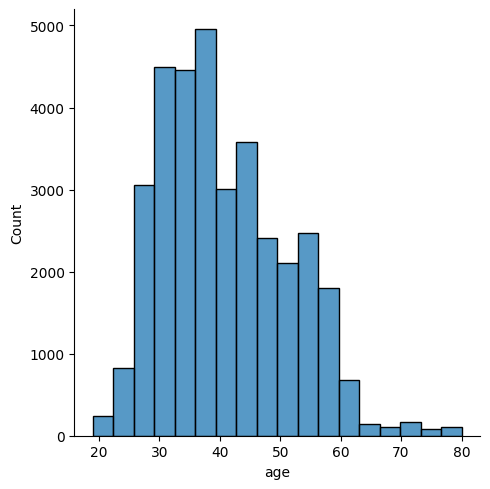

In [19]:
sns.displot(df_clean['age'], bins=18)

Retiraremos os superhumanos com 150 anos, os acima de 80 pela falta de dados e os abaixo de 18 por não fazer sentido para o problema

Balance

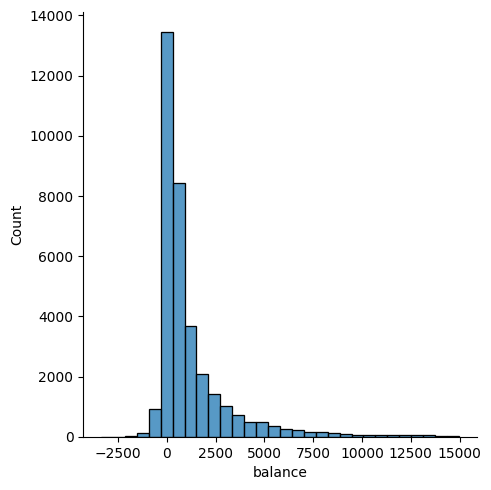

In [20]:
sns.displot(df_clean['balance'], bins=30)

### Histograma de tipos de trabalho

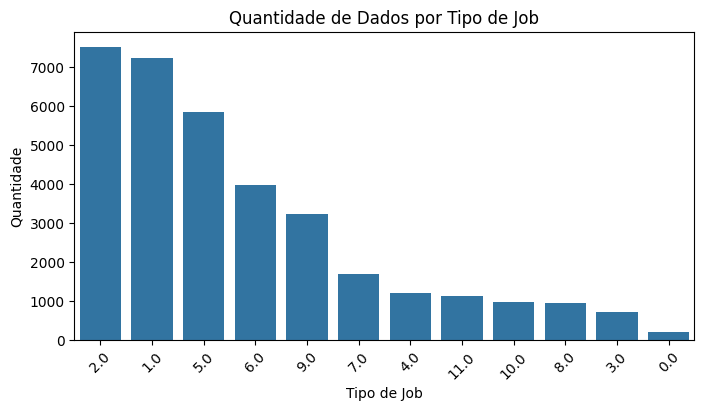

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_clean, x='job', order=df_clean['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Quantidade de Dados por Tipo de Job')
plt.xlabel('Tipo de Job')
plt.ylabel('Quantidade')
plt.show()

### CountPlot por marital

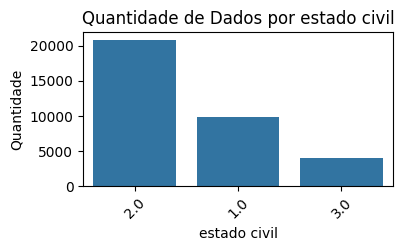

In [22]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df_clean, x='marital', order=df_clean['marital'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Quantidade de Dados por estado civil')
plt.xlabel('estado civil')
plt.ylabel('Quantidade')
plt.show()

### CountPlot por nivel de educação

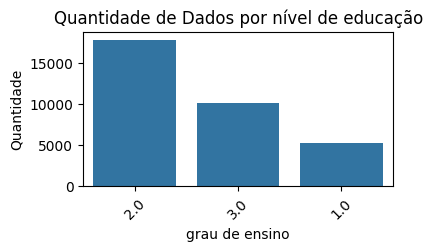

In [23]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df_clean, x='education', order=df_clean['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Quantidade de Dados por nível de educação')
plt.xlabel('grau de ensino')
plt.ylabel('Quantidade')
plt.show()

Visualizar unicos após as alterações

In [24]:
categoricas = df_clean.select_dtypes(include=['object','float64','int64']).columns.tolist()

for col in categoricas:
  print(col)
  print(df_clean[col].unique(), "\n")

age
[41. 42. 26. 54. 43. 34. 40. 45. 32. 60. 47. 46. 31. 53. 27. 29. 35. 36.
 37. 50. 57. 30. 58. 33. 44. 48. 61. 28. 25. 39. 51. 63. 59. 38. 70. 56.
 65. 49. 55. 21. 22. 71. 52. 74. 23. 24. 64. 19. 78. 62. 77. 69. 66. 80.
 68. 67. 75. 20. 72. 73. 76. 79.] 

job
[ 1.  2.  3.  4.  5.  7.  8.  9.  6. 10.  0. 11.] 

marital
[1. 2. 3.] 

education
[ 3.  1.  2. nan] 

default
[0 1] 

balance
[ 4522.   398.   706. ...  4820. 13851.  4889.] 

housing
[0 1] 

loan
[0 1] 

contact
[1. 0. 2.] 

day
[28 16  8 19  6 13 14  7 18  4 26  3 21  9 31 20 30  2 29 23 17 15 11 10
 27  1  5 12 24 25 22] 

month
[ 8  5 10 11  4  6  7  1  2  3 12  9] 

duration
[  55  251  118 ... 1388 1489 1167] 

campaign
[ 1.  4.  3.  6.  2.  5. nan 31. 13. 30.  7. 26.  8. 19. 10. 14.  9. 12.
 15. 29. 22. 16. 17. 18. 11. 24. 28. 33. 36. 21. 20. 25. 23. 32. 27. 35.
 43. 55. 41. 37. 38. 39. 34. 50. 58.] 

pdays
[ -1 105 322 259 100   5 348 314 349 273 149  91 462 150 123 316 244  97
 183 356 112 359 140 365 102 278 256 184 

# Análise de dados úteis 

Tabela de média de Y por trabalho

C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\1495989574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_trabalho.index, y=mean_sucesso_trabalho, palette='Set2',)


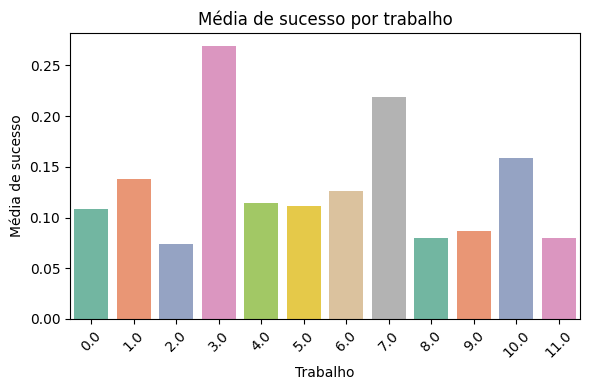

In [25]:
mean_sucesso_trabalho = df_clean.groupby('job')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_trabalho = mean_sucesso_trabalho.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_sucesso_trabalho.index, y=mean_sucesso_trabalho, palette='Set2',)
plt.title('Média de sucesso por trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Média de sucesso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Média de Y por educação

C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\1916903566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_educacao.index, y=mean_sucesso_educacao, palette='Set2')


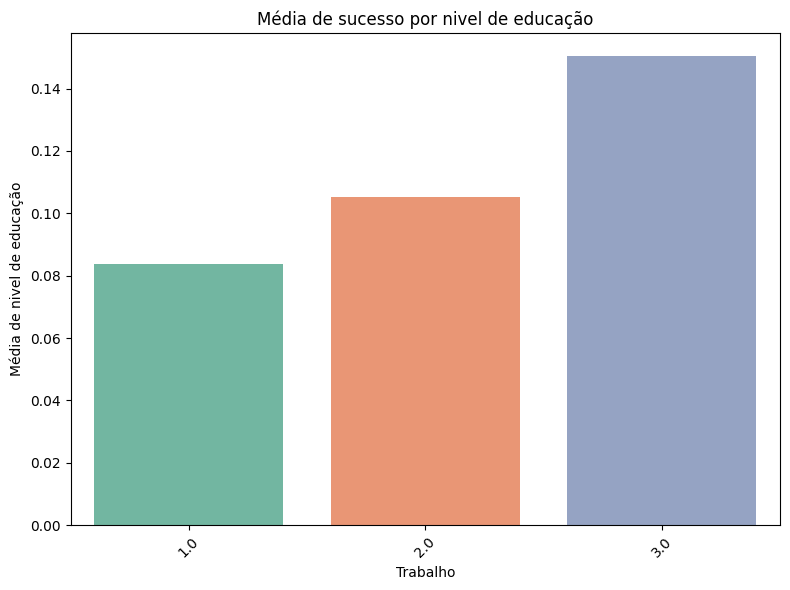

In [26]:
mean_sucesso_educacao = df_clean.groupby('education')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_educacao = mean_sucesso_educacao.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_educacao.index, y=mean_sucesso_educacao, palette='Set2')
plt.title('Média de sucesso por nivel de educação')
plt.xlabel('Trabalho')
plt.ylabel('Média de nivel de educação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Média de Y por idade 

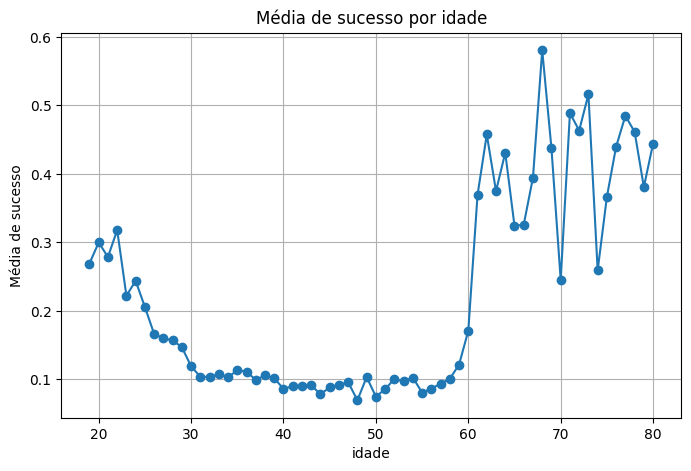

In [27]:
# Agrupar por 'age' e calcular a média de 'y'
age_mean_y = df_clean.groupby('age')['y'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(8, 5))
plt.plot(age_mean_y['age'], age_mean_y['y'], marker='o')
plt.xlabel('idade')
plt.ylabel('Média de sucesso')
plt.title('Média de sucesso por idade')
plt.grid(True)
plt.show()


C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\2720719373.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_estado_civil.index, y=mean_sucesso_estado_civil, palette='Set2')


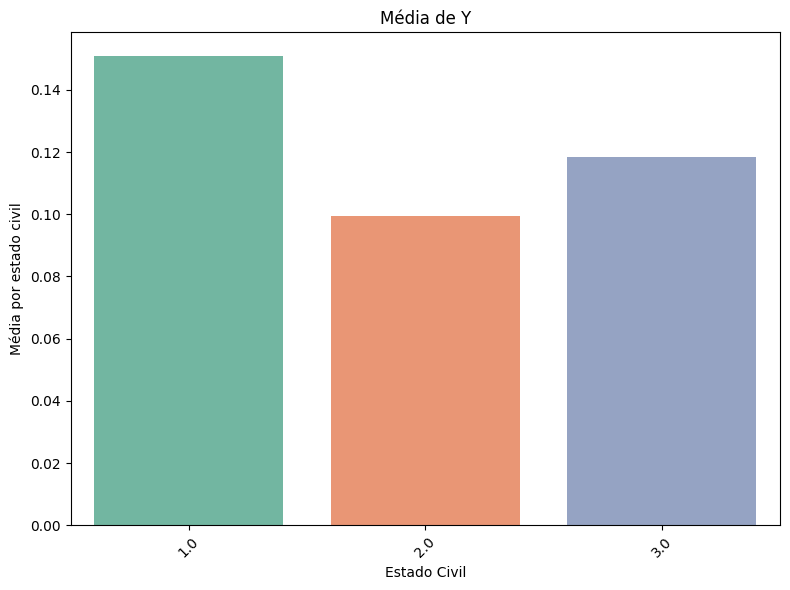

In [28]:
mean_sucesso_estado_civil = df_clean.groupby('marital')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_estado_civil = mean_sucesso_estado_civil.sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_estado_civil.index, y=mean_sucesso_estado_civil, palette='Set2')
plt.title('Média de Y')
plt.xlabel('Estado Civil')
plt.ylabel('Média por estado civil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\3893543457.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_default.index, y=mean_sucesso_default, palette='Set2')


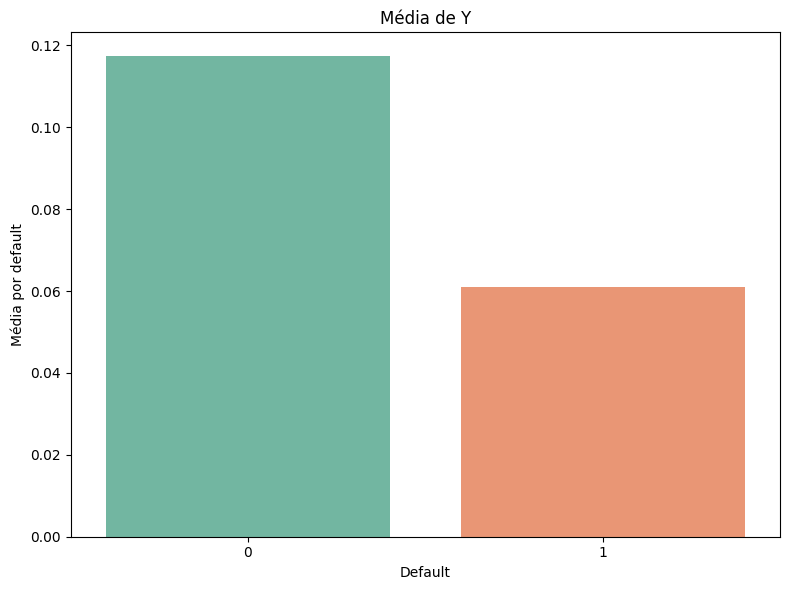

In [29]:
mean_sucesso_default = df_clean.groupby('default')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_default = mean_sucesso_default.sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_default.index, y=mean_sucesso_default, palette='Set2')
plt.title('Média de Y')
plt.xlabel('Default')
plt.ylabel('Média por default')
plt.tight_layout()
plt.show()

C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\1626749542.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y_balance.index, y=mean_y_balance, palette='Set2')


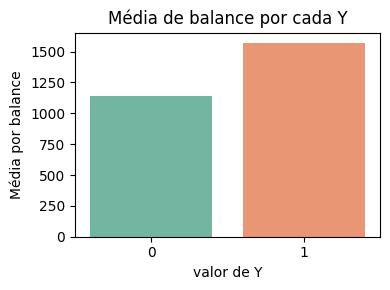

In [30]:
mean_y_balance = df_clean.groupby('y')['balance'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_y_balance = mean_y_balance.sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(4, 3))
sns.barplot(x=mean_y_balance.index, y=mean_y_balance, palette='Set2')
plt.title('Média de balance por cada Y')
plt.xlabel('valor de Y')
plt.ylabel('Média por balance')
plt.tight_layout()
plt.show()

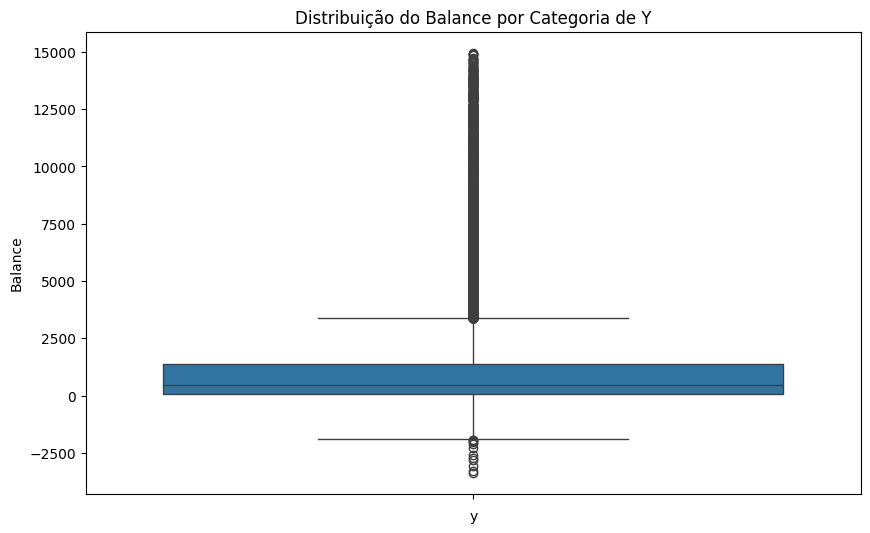

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='balance', data=df_clean)

# Títulos e rótulos
plt.title('Distribuição do Balance por Categoria de Y')
plt.xlabel('y')
plt.ylabel('Balance')

# Exibindo o gráfico
plt.show()

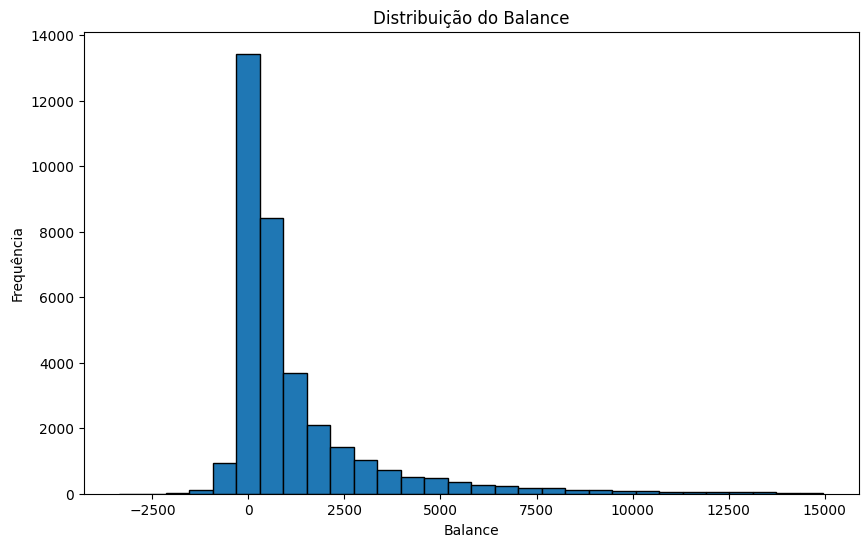

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['balance'], bins=30, edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição do Balance')
plt.xlabel('Balance')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

C:\Users\jvmil\AppData\Local\Temp\ipykernel_1932\982123523.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y_contact.index, y=mean_y_contact, palette='Set2')


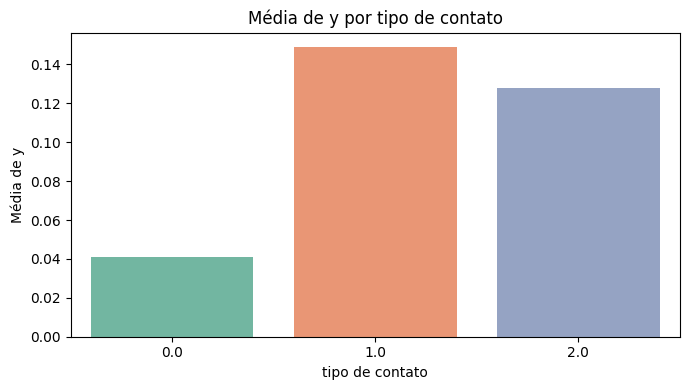

In [33]:
mean_y_contact = df_clean.groupby('contact')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_y_contact = mean_y_contact.sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(7, 4))
sns.barplot(x=mean_y_contact.index, y=mean_y_contact, palette='Set2')
plt.title('Média de y por tipo de contato')
plt.xlabel('tipo de contato')
plt.ylabel('Média de y')
plt.tight_layout()
plt.show()

média de Y por dia

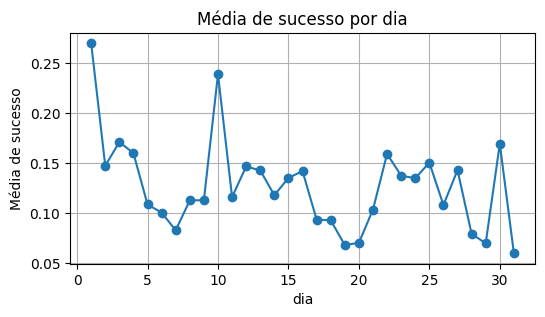

In [35]:
# Agrupar por 'age' e calcular a média de 'y'
age_mean_y = df_clean.groupby('day')['y'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(6, 3))
plt.plot(age_mean_y['day'], age_mean_y['y'], marker='o')
plt.xlabel('dia')
plt.ylabel('Média de sucesso')
plt.title('Média de sucesso por dia')
plt.grid(True)
plt.show()

Quantidade de dias por dia

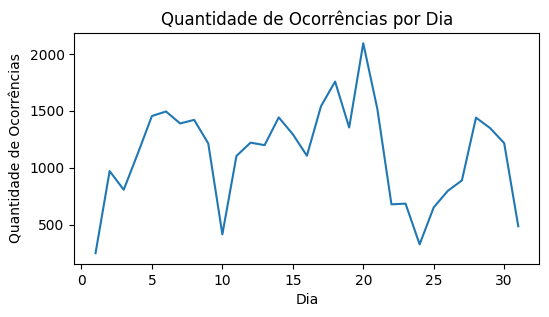

In [37]:
day_counts = df_clean['day'].value_counts().sort_index()

# Criar um gráfico de linha
plt.figure(figsize=(6, 3))
sns.lineplot(x=day_counts.index, y=day_counts.values)
plt.title('Quantidade de Ocorrências por Dia')
plt.xlabel('Dia')
plt.ylabel('Quantidade de Ocorrências')
plt.show()

Heatmap

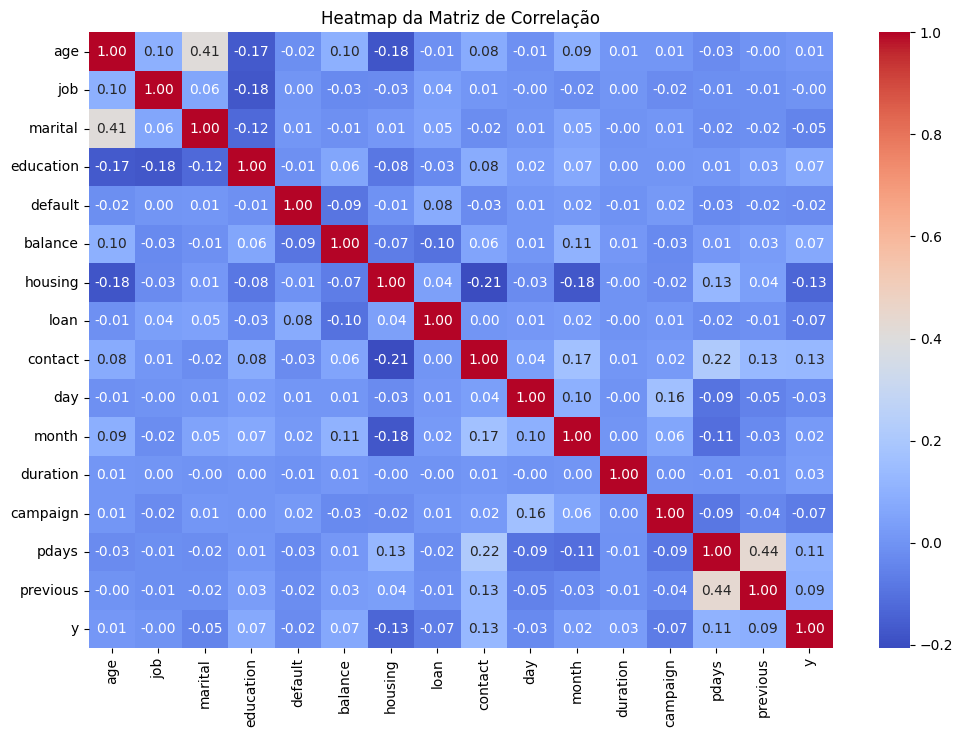

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Matriz de Correlação')
plt.show()